In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten and normalize the input data
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Learning rate scheduler function
def scheduler(epoch, lr):
    if epoch > 10:
        return lr * 0.1
    return lr

# Define the model with L2 regularization and Dropout
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(784,)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with learning rate scheduler callback
lr_callback = LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[lr_callback])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7784 - loss: 1.1144 - val_accuracy: 0.9504 - val_loss: 0.4187 - learning_rate: 0.0010
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9387 - loss: 0.4414 - val_accuracy: 0.9636 - val_loss: 0.3107 - learning_rate: 0.0010
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9524 - loss: 0.3398 - val_accuracy: 0.9657 - val_loss: 0.2708 - learning_rate: 0.0010
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9573 - loss: 0.2941 - val_accuracy: 0.9712 - val_loss: 0.2342 - learning_rate: 0.0010
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9608 - loss: 0.2622 - val_accuracy: 0.9726 - val_loss: 0.2200 - learning_rate: 0.0010
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9631 - loss: 0.2499 - val_accuracy: 0.9733 - val_loss: 0.2123 - learning_rate: 0.0010
Epoch 7/20
375/375 ━━━━━━━━━━━━

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt


In [4]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Flatten and normalize input data
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print data shapes
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


Training data shape: (60000, 784)
Testing data shape: (10000, 784)


In [5]:
# Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch > 10:
        return lr * 0.1  # Reduce LR after epoch 10
    return lr


In [6]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,),
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(128, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[LearningRateScheduler(lr_scheduler)])


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6833 - loss: 1.3276 - val_accuracy: 0.8383 - val_loss: 0.7068 - learning_rate: 0.0010
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8292 - loss: 0.7284 - val_accuracy: 0.8553 - val_loss: 0.5971 - learning_rate: 0.0010
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8430 - loss: 0.6238 - val_accuracy: 0.8466 - val_loss: 0.5684 - learning_rate: 0.0010
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8471 - loss: 0.5728 - val_accuracy: 0.8462 - val_loss: 0.5390 - learning_rate: 0.0010
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8506 - loss: 0.5485 - val_accuracy: 0.8539 - val_loss: 0.5083 - learning_rate: 0.0010
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8537 - loss: 0.5327 - val_accuracy: 0.8522 - val_loss: 0.5085 - learning_rate: 0.0010
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8544 - loss: 0.5

In [9]:
#  Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"❌ Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8765 - loss: 0.4398

✅ Test Accuracy: 0.8724
❌ Test Loss: 0.4452


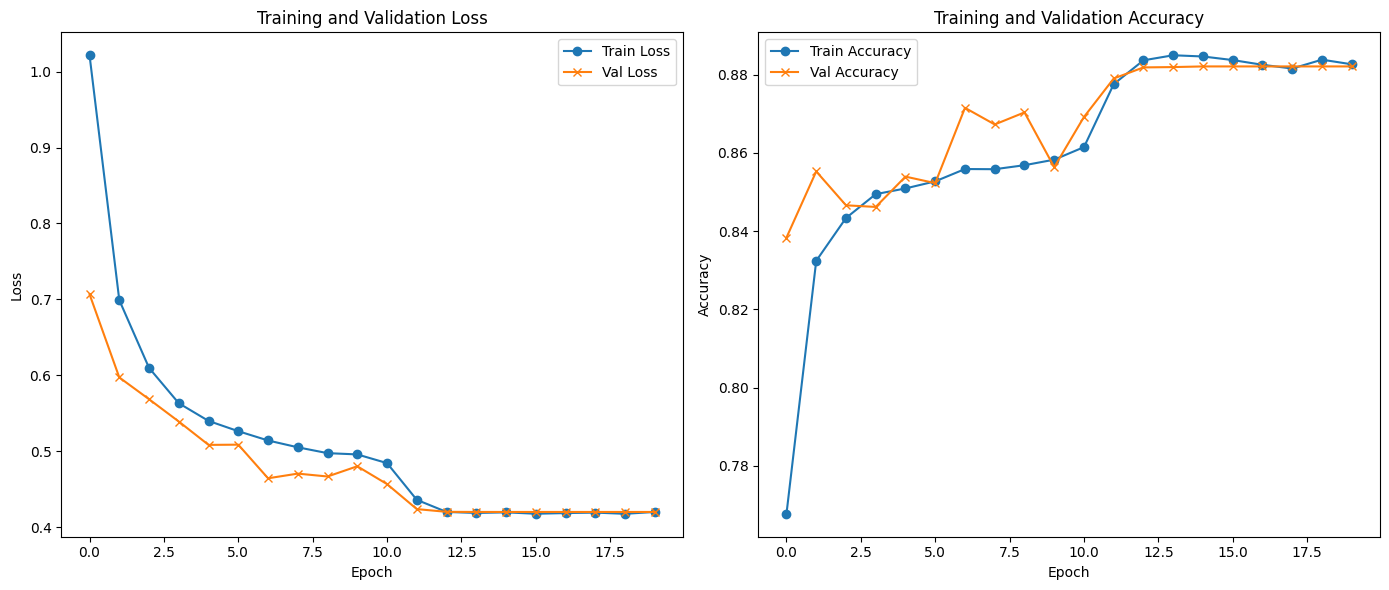

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


L2 regularization, commonly known as weight decay, is a regularization technique used in machine learning to prevent overfitting by penalizing large weight values in the model. It is widely used in deep learning models to encourage simpler, more generalizable solutions. n L2 regularization, a penalty term is added to the model’s loss function:

Loss = Original Loss + 𝜆 ∑ 𝑤 2 Loss=Original Loss+λ∑w 2

Here, 𝜆 λ is the regularization strength (also called the weight decay factor).

𝑤 w represents the model's weights.

This penalizes models with large weights, which are more likely to memorize training data (overfitting), rather than learning the true underlying patterns.

During training:

The optimizer minimizes the combined loss, which includes the original loss (e.g., cross-entropy) and the L2 penalty.

This encourages the model to keep weights small, leading to simpler and more stable representations.Model generalization refers to a machine learning model’s ability to perform well on unseen data—data that was not used during training. It is a fundamental goal in machine learning: building models that not only fit training data but also make accurate predictions on new, real-world inputs.Generalization is the model’s capacity to learn the true patterns in the data, rather than just memorizing the training examples.

A model with good generalization will have similar performance on both training and test data.

A model with poor generalization will show high training accuracy but low test accuracy, a phenomenon known as overfitting.

Train/Test Split: Compare performance (accuracy, loss) on training vs test sets.

Cross-Validation: Repeated training/testing on different data splits.

Generalization Gap:

Gap = Training Accuracy − Test Accuracy Gap=Training Accuracy−Test Accuracy Smaller gap = better generalization.In deep learning, training loss measures how well the model fits the training data during each epoch. While a lower training loss typically indicates better performance, it does not always correlate with generalization to unseen data. Regularization techniques such as L2 regularization and Dropout are used to improve model generalization, but they often affect training loss in specific ways.Training loss is the output of a loss function (like cross-entropy or MSE) that compares predicted values with actual values during model training. The goal of training is to minimize this loss.

However, minimizing it too aggressively can lead to:

Memorization of training data (overfitting)

Poor generalization to new inputs

L2 Regularization (Weight Decay) Adds a penalty to the loss function based on the magnitude of model weights. The modified loss becomes:

Loss = Original Loss + 𝜆 ∑ 𝑤 2 Loss=Original Loss+λ∑w 2

Effect on Training Loss:

Training loss becomes slightly higher, because the optimizer is balancing both prediction accuracy and weight minimization.

Dropout Randomly disables neurons during training to prevent reliance on specific features. Effect on Training Loss:

Causes the model to train with partial network structure each time.

Increases training difficulty and introduces more noise, resulting in higher training loss compared to a model without dropout.

Early Stopping & Learning Rate Schedulers These don’t directly increase training loss but may prevent it from reaching extremely low values in favor of achieving better validation performance.